# Bias/Variance Tradeoff


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
# Generate a synthetic dataset (sine curve with noise)
np.random.seed(42)

X = np.sort(np.random.rand(100, 1) * 10, axis=0)  # 100 random points between 0 and 10
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # y = sin(x) + noise

In [3]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test, label):
    '''
    Function to plot learning curves for models of varying complexity
    '''
    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Calculate mean and std deviation of train/test scores
    train_errors = -train_scores.mean(axis=1)
    test_errors = -test_scores.mean(axis=1)
    
    # Plot learning curves
    plt.plot(train_sizes, train_errors, label=f'{label} - Train', color='blue')
    plt.plot(train_sizes, test_errors, label=f'{label} - Test', color='red')

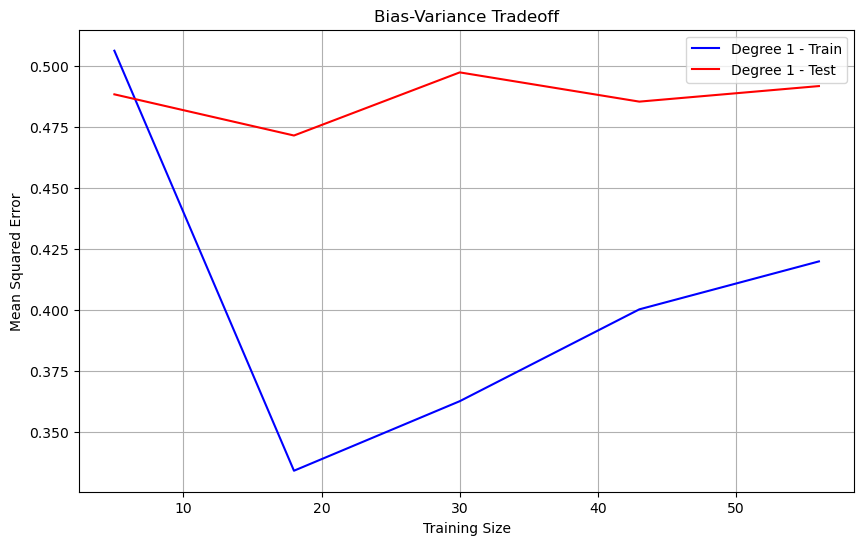

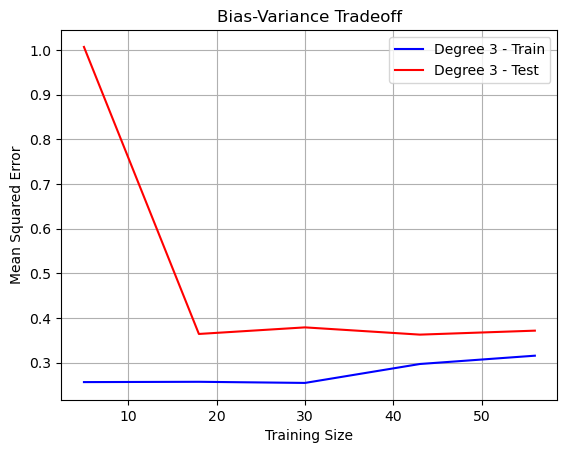

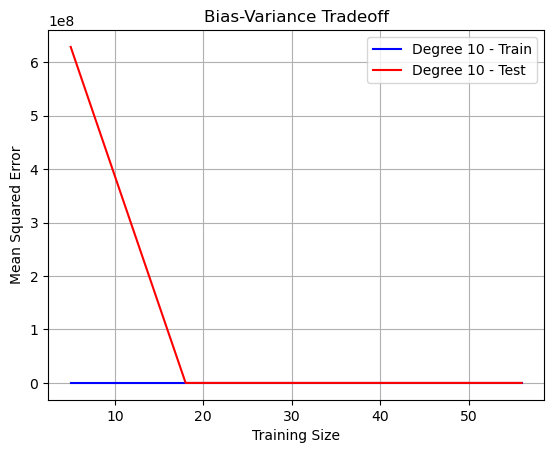

In [10]:
# Fit models with varying polynomial degrees
plt.figure(figsize=(10, 6))
for degree in [1, 3, 10]:  # Polynomial degrees for low, moderate, and high complexity
    # Polynomial features to increase model complexity
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    # Train model (Linear regression in this case)
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Plot learning curve for each degree of polynomial
    plot_learning_curve(model, X_poly_train, y_train, X_poly_test, y_test, label=f'Degree {degree}')
    
    # Plot formatting
    plt.title('Bias-Variance Tradeoff')
    plt.xlabel('Training Size')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
# To show the bias-variance effect, let's compute MSE for each degree model on both train and test sets
for degree in [1, 3, 10]:
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    train_mse = mean_squared_error(y_train, model.predict(X_poly_train))
    test_mse = mean_squared_error(y_test, model.predict(X_poly_test))
    
    print(f"Degree {degree}:")
    print(f"  Train MSE: {train_mse:.4f}")
    print(f"  Test MSE: {test_mse:.4f}\n")

Degree 1:
  Train MSE: 0.4268
  Test MSE: 0.4377

Degree 3:
  Train MSE: 0.3210
  Test MSE: 0.3657

Degree 10:
  Train MSE: 0.0084
  Test MSE: 0.0061

